In [98]:
from pathlib import Path
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [99]:
plt.rcParams.update({
    "text.usetex": True,    
    "font.size": 12
})
img_dir = Path('/home/cmendoza/MEGA/Research/dissertation/LaTeX/img/')

In [100]:
uf = urlopen('https://www.eecis.udel.edu/~boncelet/')
html = uf.read()
soup = BeautifulSoup(html, 'html.parser')

In [101]:
txt = soup.get_text()
txt = txt.replace('\n', '')
txt

'Charles Boncelet\'s Home Page | Boncelet HomepageSkip to main contentToggle navigationBoncelet HomepageResearchPublicationsIPythonBlogArchiveTagsRSS feedSourceCharles Boncelet\'s Home PageUniversity of DelawareProfessorDepartment of Electrical & Computer Engineering313 Evans HallNewark DE 19716boncelet@udel.edu302-831-8008 (w)  I have a joint appointment in the Department of Computer & Information Sciences.  I am a Past President of the University of Delaware Faculty Senate and was a long time Associate Chair of the ECE Departmet in charge of the undergraduate program.I have held visiting positions at the University of Michigan (1992), Tampere University of Technology in Tampere, Finland (1999), the Australian Defence Force Academy in Canberra, Australia (2000), the University of Electronic Science and Technology of China in Chengdu, China, and the Idaho National Laboratory.BookMy textbook, Probability, Statistics, and Random Signals, is out.  It is available through my publisher, Oxf

In [102]:
count_vect = CountVectorizer()

In [103]:
txt_cnts = count_vect.fit_transform([soup.get_text()])
txt_cnts

<1x363 sparse matrix of type '<class 'numpy.int64'>'
	with 363 stored elements in Compressed Sparse Row format>

In [104]:
idx2word = {k:v for v, k in count_vect.vocabulary_.items()}

In [105]:
txt_cnts = txt_cnts.toarray().squeeze()
isort = np.argsort(-txt_cnts)
for idx in isort:
    print(f'{idx2word[idx]}: {txt_cnts[idx]}')

and: 44
the: 18
in: 17
of: 15
university: 10
boncelet: 9
for: 9
signal: 8
to: 8
processing: 8
my: 6
various: 6
random: 6
have: 6
probability: 5
engineering: 5
electrical: 4
digital: 4
computer: 4
data: 4
patent: 4
signals: 4
statistics: 4
past: 3
blog: 3
jr: 3
charles: 3
communications: 3
on: 3
or: 3
it: 3
research: 3
is: 3
over: 3
information: 3
python: 3
solutions: 3
science: 3
me: 3
am: 3
took: 3
with: 3
are: 2
following: 2
problem: 2
prof: 2
program: 2
expert: 2
examples: 2
every: 2
publications: 2
through: 2
using: 2
regression: 2
algorithms: 2
robust: 2
rossi: 2
department: 2
delaware: 2
melbourne: 2
curriculum: 2
amazon: 2
was: 2
principally: 2
princeton: 2
press: 2
matlab: 2
methods: 2
many: 2
main: 2
years: 2
link: 2
linear: 2
year: 2
worked: 2
cover: 2
out: 2
oxford: 2
page: 2
image: 2
homepage: 2
home: 2
has: 2
group: 2
graduate: 2
golf: 2
ipython: 2
courses: 2
eleg: 2
your: 2
students: 2
technical: 2
class: 2
steganography: 2
chapters: 2
two: 2
book: 2
compression: 2
china:

<BarContainer object of 363 artists>

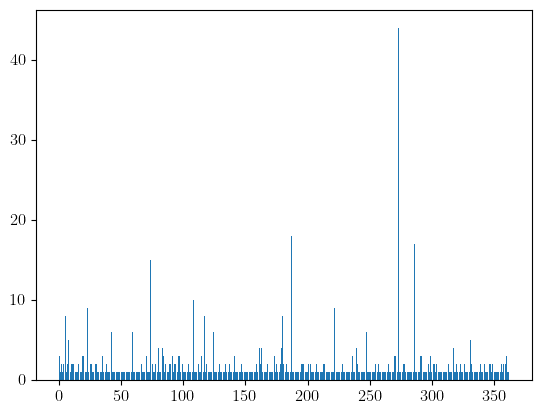

In [96]:
plt.bar(isort, txt_cnts)